# spotlob


Version 0.9.0a

---

Python meetup 18.04.2019


Fabian Meyer

Fraunhofer ISE

# Task: image segmentation

* Find features in scientific image data
* Precise measurement
* Traceable and repeatable evaluation
* no training data available
* Semi-automatic: tweaking will be needed


<img src="presentation-images/usecases.png">

# There is very mature software for this...


<br>
<table>
    <tr>
        <td>
            <img src="presentation-images/opencv.png" height="200" width="200">
        </td>
        <td>
            <img src="presentation-images/scikit-image.png" height="200" width="200">
        </td>
    </tr>  
    <tr>
        <td style="text-align:left; font-size:16pt">
            <h3>OpenCV</h3>
            <ul>
                <li>C/C++ with Python interface</li>
                <li>fast</li>
                <li>also very popular outside Python world</li>
                <li>not exactly pythonic to use</li>
            </ul>  
        </td>
        <td style="text-align:left; font-size:16pt; vertical-align:top">
            <h3>Scikit-image</h3>
            <ul>
                <li>Python/Cython</li>
                <li>feature-rich</li>
                <li>integrates well with other popular python packages</li>
                <li>great documentation</li>
            </ul>
        </td>
    </tr>  
</table>

# Why spotlob?

## Typical workflow

1. record a new set of images
2. search for an old script to evaluate them
3. doesn't work
4. search for another script to evaluate them
3. doesn't work
4. merge the scripts and make it work by iteratively changing parameters
5. apply script on whole set of images
6. memory full

## Two months later: next set of images
start all over

# Why spotlob?

* finding the right detection quicker
* standardize for later use
* don't lose flexibility compared to scripting
* jupyter compatible
* low memory consumption
* multithreaded batch processing
* combine multiple libraries

# Notebook demo

In [1]:
%matplotlib notebook

In [3]:
import sys
sys.path.append("../")

<IPython.core.display.Javascript object>


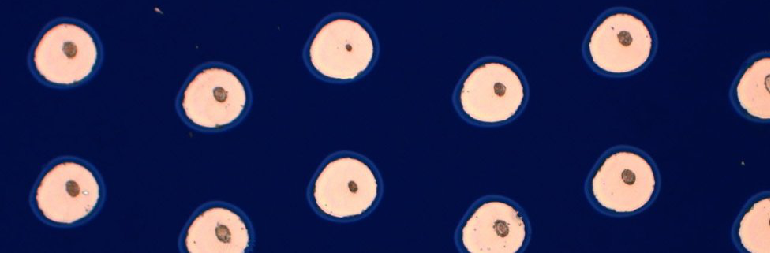

Button(description='Evaluate', style=ButtonStyle())

In [5]:
from spotlob.defaults import *

gui = make_gui("presentation-images/demoim.jpg")
show_gui(gui)

<img src="presentation-images\pipeline.png">

# Detection process steps

# Conversion

<img src="presentation-images/hsv.png" width="800px" height="600px">

<img src="presentation-images\pipeline.png">

# Detect features - the pipeline

1. Load image as array
2. Extract a single channel
4. Binarization
6. Find connected areas
7. Evaluate them

# Results as pandas dataframes

In [6]:
gui.results()

,area_px2,ellipse_position_px,ellipse_majorAxis_px,ellipse_minorAxis_px,ellipse_angle
0,4447.0,"[85.51273345947266, 245.98255920410156]",71.866829,78.851410,55.719532
1,4485.0,"[437.53607177734375, 239.4545440673828]",72.901810,78.928467,63.608746
2,4446.0,"[790.3968505859375, 232.73939514160156]",72.717896,77.737045,54.171394
3,4395.5,"[271.1011962890625, 125.71712493896484]",71.427666,78.705048,62.689610
4,4452.5,"[623.026611328125, 119.57523345947266]",72.917793,78.404922,60.146282
5,4476.0,"[82.86161041259766, 70.11881256103516]",73.242218,77.977859,56.980961
6,4537.5,"[432.65869140625, 64.06485748291016]",73.407005,78.528976,65.658501
7,4397.0,"[785.8518676757812, 56.76166534423828]",72.272186,77.969002,62.808472


# The pipeline

In [7]:
print(gui.pipeline)

SimpleReader
GreyscaleConverter
- conversion: Grey
- invert: False
GaussianPreprocess
- kernelsize: 1
OtsuThreshold
PostprocessNothing
ContourFinderSimple
FeatureFormFilter
- minimal_area: 500
- solidity_limit: 0
- remove_on_edge: True
CircleAnalysis



# The pipeline

* the sequence of processes to apply, ProcessSteps
* the parameters

= everything you need to know to repeat the detection

# Store the pipeline

In [8]:
gui.pipeline.save("mypipe.pipe")

# and restore

In [9]:
from spotlob.pipeline import Pipeline

mypipe = Pipeline.from_file("mypipe.pipe")

print(mypipe)

SimpleReader
GreyscaleConverter
- conversion: Grey
- invert: False
GaussianPreprocess
- kernelsize: 1
OtsuThreshold
PostprocessNothing
ContourFinderSimple
FeatureFormFilter
- minimal_area: 500
- solidity_limit: 0
- remove_on_edge: True
CircleAnalysis



# batch processing

In [10]:
from glob import glob

all_images = glob("image_folder/*.jpg")

In [11]:
from spotlob.batch import batchprocess

all_results = batchprocess("mypipe.pipe", all_images)

In [12]:
all_results.groupby("filename").agg(["mean", "std"])

area_px2             ellipse_majorAxis_px            \
                              mean         std                 mean       std   
filename                                                                        
image_folder\-001.jpg  122396.8750  372.239818           365.869740  4.362172   
image_folder\-002.jpg  120410.8750  292.602088           361.633175  1.937565   
image_folder\-003.jpg  118319.1250  414.873109           359.555897  2.666814   
image_folder\-004.jpg  114009.3125  282.121673           351.457066  3.012233   
image_folder\-005.jpg  111575.5000  250.702014           349.187534  2.443265   
image_folder\-006.jpg  109435.9375  247.796206           344.640587  2.182458   
image_folder\-007.jpg  108037.5625  404.444543           342.220856  1.202038   
image_folder\-008.jpg  106176.5000  343.497349           338.560795  1.868279   
image_folder\-009.jpg  104128.2500  404.832946           336.288223  2.100062   
image_folder\-010.jpg  100698.1250  404.700661           330.634808  0.902664   
image_folder\-011.jpg   98678.1250  641.226489           327.819794  2.235954   
image_folder\-012.jpg   96956.5000  620.460658           324.652790  1.680312   
image_folder\-013.jpg   94113.0000  589.730931           319.846909  2.311917   
image_folder\-014.jpg   91702.9375  437.169829           315.090260  1.087111   
image_folder\-015.jpg   89612.0625  633.653941           312.008717  2.555610   
image_folder\-016.jpg   87887.2500  812.773427           308.151039  2.549371   
image_folder\-017.jpg   85134.6875  911.079891           304.200008  1.820882   
image_folder\-018.jpg   83398.6250  361.979750           301.428547  1.799439   
image_folder\-019.jpg   81344.5625  675.679152           297.185143  1.559840   
image_folder\-020.jpg   78676.5625  676.059086           292.690556  1.041394   
image_folder\-021.jpg   76936.1875  917.798762           289.823978  1.602008   
image_folder\-022.jpg   75048.1250  784.557371           286.759602  1.264285   
image_folder\-023.jpg   72689.3125  886.144093           282.927986  2.014885   

                      ellipse_minorAxis_px           ellipse_angle            
                                      mean       std          mean       std  
filename                                                                      
image_folder\-001.jpg           426.028366  4.063801     83.778962  3.657999  
image_folder\-002.jpg           424.202003  2.168602     82.762461  3.097711  
image_folder\-003.jpg           419.657013  2.121575     81.934522  2.508781  
image_folder\-004.jpg           413.397129  3.492354     83.288732  2.725337  
image_folder\-005.jpg           407.189388  2.333984     82.960870  2.298772  
image_folder\-006.jpg           405.123459  3.203281     82.014825  1.304366  
image_folder\-007.jpg           402.711655  2.123235     82.412578  2.196316  
image_folder\-008.jpg           399.854801  3.570572     82.092192  1.515542  
image_folder\-009.jpg           394.647675  1.902917     82.118033  1.628507  
image_folder\-010.jpg           388.468235  1.929377     81.675476  2.515235  
image_folder\-011.jpg           383.650391  4.793162     82.075534  2.034731  
image_folder\-012.jpg           380.667320  2.198627     81.685264  1.886229  
image_folder\-013.jpg           374.980251  2.362812     82.485617  1.839138  
image_folder\-014.jpg           370.980366  2.084568     80.141206  1.856798  
image_folder\-015.jpg           366.043789  4.573523     82.127966  1.991111  
image_folder\-016.jpg           363.419449  2.534387     83.400367  0.947877  
image_folder\-017.jpg           356.942783  2.827786     82.875254  1.902013  
image_folder\-018.jpg           353.164040  1.784330     83.107866  0.795157  
image_folder\-019.jpg           349.272259  2.021904     82.453626  2.334524  
image_folder\-020.jpg           343.655632  3.050932     82.332353  2.861072  
image_folder\-021.jpg           339.742420  4.320781     84.010685  1.975612  
image_folder\-022.jpg  

# Change the pipeline

another binarization function

In [13]:
from spotlob.process_opencv import BinaryThreshold

binarization = BinaryThreshold(threshold = 100)

new_pipeline = gui.pipeline.replaced_with(binarization)

print(new_pipeline)

SimpleReader
GreyscaleConverter
- conversion: Grey
- invert: False
GaussianPreprocess
- kernelsize: 1
BinaryThreshold
- threshold: 100
PostprocessNothing
ContourFinderSimple
FeatureFormFilter
- minimal_area: 500
- solidity_limit: 0
- remove_on_edge: True
CircleAnalysis



# Use the new pipeline

In [16]:
gui = make_gui("presentation-images/demoim.jpg")

gui.pipeline = new_pipeline

show_gui(gui)

Button(description='Evaluate', style=ButtonStyle())

# Extend spotlob: subclassing

In [17]:
from spotlob.process_steps import Binarization

class MyThreshold(Binarization):
    
    def __init__(self, threshold):
        threshold_parameter = NumericRangeParameter("threshold", threshold, 0, 255)
        
        pars = SpotlobParameterSet([threshold_parameter])
        
        super(BinaryThreshold, self).__init__(self.threshold_fn, pars)

    def my_threshold_function(self, grey_image, threshold):
        _, im = cv2.threshold(grey_image, threshold, 255, cv2.THRESH_BINARY)
        return im

# Extend spotlob: with a function...

In [18]:
import numpy as np

def my_threshold(image, lower_threshold, upper_threshold):
    above_lower = image > lower_threshold
    below_upper = image < upper_threshold
    
    out = np.logical_and(above_lower,
                         below_upper).astype(np.uint8)*255
    return out

# Extend spotlob: ...using decorators

In [20]:
from spotlob.register import PROCESS_REGISTER as register

gui = make_gui("presentation-images/demoim.jpg")

@use_in(gui)
@register.binarization_plugin([("lower_threshold",(0,255,100)),
                               ("upper_threshold",(0,255,200))])
def my_threshold(image, lower_threshold, upper_threshold):
    above_lower = image > lower_threshold
    below_upper = image < upper_threshold
    
    out = np.logical_and(above_lower,
                         below_upper).astype(np.uint8)*255
    return out

# `@use_in(gui)`

<IPython.core.display.Javascript object>


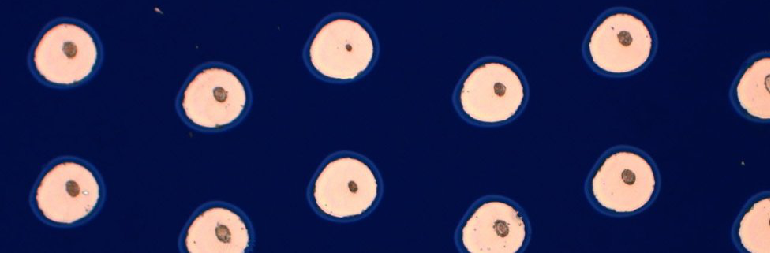

Button(description='Evaluate', style=ButtonStyle())

In [21]:
%matplotlib notebook
show_gui(gui)

# jupyter.ise.fhg.de

use kernel `Python 3.6.3`

# Installation

```
pip install spotlob
```

# Source & docs

```
https://gitlab.cc-asp.fraunhofer.de/fmeyer/spotlob
```

# Thank you
## for your attention

# Questions
# Suggestions